<a href="https://colab.research.google.com/github/marcelorandolfo/data-science/blob/master/doencas_cardiovasculares_machine_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prevendo o diagnóstico de Doenças Cardiovasculares: uma aplicação de *Machine Learning*

Doenças cardiovasculares são consideras como um grupo de doenças que afetam o coração e os vasos sanguíneos. Fazem parte do grupo de doenças cardiovasculares, doenças como:

* Doença coronariana
* Doença cerebrovascular
* Doença arterial periférica
* Doença cardíaca reumática
* Cardiopatia congênita – malformações na estrutura do coração existentes desde o momento do nascimento
* Trombose venosa profunda e embolia pulmonar.

<center><img src='https://raw.githubusercontent.com/marcelorandolfo/data-science/master/images/heart_medical.jpg'width='450px' ></center>


Apesar da cardiopatia congênita ser causada por malformações na estrutura do coração que existem desde o nascimento, as demais doenças cardiovasculares podem ser prevenidas por meio de hábitos mais saudáveis como: não fumar, não beber em excesso, praticar exercícios físicos regularmente, fazer uso de dietas mais nutritivas, entre outros.

<center><img src='https://raw.githubusercontent.com/marcelorandolfo/data-science/master/images/heart_disease_health.jpg'width='400px' ></center>


Mas segundo um artigo da [Nature](https://www.nature.com/articles/s41551-018-0195-0), a partir de um método de *Machine Learning*, foi observado que características que antes não eram consideradas como fator de risco para doenças cardiovasculares, como idade, sexo, pressão arterial, contribuem sim na chance de se desenvolver uma doença cardíaca.

Considerando que doenças cardiovasculares são a principal causa de morte no mundo, segundo a [Organização Pan-Americana da Saúde](https://www.paho.org/bra/index.php?option=com_content&view=article&id=5253:doencas-cardiovasculares&Itemid=1096), é importante entender os principais fatores que levam as pessoas a desenvolveram doenças cardíacas, de forma a realizar um diagnóstico mais preciso e aumentar as chances de sobrevivência dos pacientes. E para isso devemos utilizar técnicas de *Machine Learning* cada vez mais .

<center><img src='https://raw.githubusercontent.com/marcelorandolfo/data-science/master/images/ml_medical.jpeg'width='400px' ></center>

## Obtenção dos dados

O *dataset* que será utilizado para estimar o modelo de *Machine Learning* foi obtido atráves da iniciativa [UCI Machine Learning](https://archive.ics.uci.edu/ml/index.php) da *University of California, Irvine*. Neste [link](https://archive.ics.uci.edu/ml/datasets/Heart+Disease) é possível obter as informações, bem como os dados, que serão utilizados. 

Entretanto, o *dataset* e o dicionário de variáveis disponibilizados não estão formatados em arquivos `csv`. No caso, os dados estão em um arquivo `.data` e o dicionário de variáveis em um arquivo `.name`. Nesse *notebook* nós não iremos trabalhar diretamente com esses dados, e sim a partir de um *dataset* já pré-processado. Caso queira, neste [link](https://github.com/marcelorandolfo/data-science/blob/master/processamento_dados_uci_heart_disease.ipynb) está o *notebook* do passo a passo que foi realizado para pré-processar os dados, além da exposição do dicionário de variáveis.

Os dados utilizados têm como fonte primária a *Cleveland Clinic Foundation*, e possuem informações pessoais e médicas de 303 pacientes (não identificados). Essas informações estão divididas em 14 diferentes atributos.


### Informações sobre os atributos

Segundo o dicionário de variáveis, os atributos estão classificados em:

* `age` - idade em anos
* `sex` - sexo do paciente
  * 0: mulher
  * 1: homem
* `cp` - tipo da dor torácica
  * 1: angina (tipo de dor no peito causada pela redução do fluxo sanguíneo para o coração) típica
  * 2: angina atípica
  * 3: dor não cardíaca
  * 4: assintomática (sem sintomas)
* `trestbps` - pressão arterial em repouso medida em mm Hg (milímetros de mércurio) no momento de admissão no hospital (considerada alta caso seja superior a 140 mm Hg)
* `chol` - colesterol sérico medido em mg/dl (sérico é um termo usado para se referir a quantidade de uma determinada substância no sangue)
* `fbs` - açúcar no sangue em jejum > 120mg/dl
  * 0: False
  * 1: True
* `restecg` - resultado do eletrocardiografia de repouso (eletrocardiografia é o processo de produção de um eletrocardiograma, gráfico de voltagem/tempo, da atividade elétrica do coração)
  * 0: normal
  * 1: anormalidades de ST-T (inversão da onda T e elevação ou depressão de > 0.05mV)
  * 2: hipertrofia ventricular esquerda provável ou definitiva (pelos critérios de Romhilt-Estes)
* `thalach` - frequência cardíaca máxima atingida, medida em batimentos por minuto (bpm)
* `exang` - angina (tipo de dor no peito causada pela redução do fluxo sanguíneo para o coração) induzida pelo exercício
  * 0: não
  * 1: sim
* `oldpeak` - depressão do segmento ST induzida pelo exercício em relação ao repouso ( segmento ST corresponde ao intervalo entre o fim da despolarização e o início da repolarização ventricular)
* `slope` - inclinação do segmento ST no pico do exercício
  * 1: ascendente
  * 2: plana
  * 3: descendente
* `ca` - número de vasos principais coloridos por fluoroscopia
* `thal` - teste de stress com tálio (teste cardiológico que mede a capacidade do coração de responder ao estresse externo em um ambiente clínico controlado, feito por estimulação farmacológica intravenosa)
  * 3: normal
  * 6: defeito fixo
  * 7: defeito reversível
* `num` - diagnóstico de doença cardíaca (diagnóstico angiográfico)
  * 0: não há doença cardíaca ( < 50% de estreitamento do diâmetro)
  * 1, 2, 3 ou 4: há doença cardíaca ( > 50% de estreitamento do diâmetro)

No nosso modelo de *Machine Learning*, a variável `num` será nosso alvo. O objetivo é estimar um modelo que prevê a probabilidade de um paciente desenvolver uma doença cardíaca, dadas as suas características pessoais e de saúde.

**Obs.:** informações entre parênteses `()` foram adicionadas para facilitar a compreensão das informações nas variáveis. Qualquer erro ou omissão é de inteira responsabilidade do autor.


### Importando os dados

Como já houve um pré-processamento dos dados, a importação do *dataset* será feito a partir do meu diretório no [Github](https://github.com/marcelorandolfo/data-science/blob/master/data/heart_disease.csv).

In [1]:
# importar as bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# estilo do notebook
sns.set()

# url dos datasets
data = 'https://raw.githubusercontent.com/marcelorandolfo/data-science/master/data/heart_disease.csv'

# importar dataset da UCI
df = pd.read_csv(data)

# visualizar as primeiras 5 entradas
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


Analisando o `DataFrame` temos que o atributo `num` nos diz se o paciente foi diagnosticado como tendo doença cardíaca ou não. Mas se observarmos os valores do atributo, cinco valores são possíveis.

In [2]:
df['num'].unique()

array([0, 2, 1, 3, 4])

Porém, no *dataset* que estamos utilizando não há distinção entre os valores [1, 2, 3, 4], todos representam que o paciente sofre de uma doença cardiovascular. Para nós, não faz sentido manter essa distinção de valores que acabam representando a mesma informação. Logo, utilizaremos a seguinte classificação:

* **0** - não há doença cardíaca
* **1** - há doença cardíaca

Para isso, basta igualar a 1 os valores compreendidos entre 1 e 4.


In [3]:
# variável num antes
df['num'].value_counts()

0    164
1     55
2     36
3     35
4     13
Name: num, dtype: int64

In [0]:
# converter valores diferentes de zero em 1
df.loc[df.num != 0, 'num'] = 1

In [5]:
# variável num depois
df.num.value_counts()

0    164
1    139
Name: num, dtype: int64

Com o *dataset* importado, e modificado de forma a ficar mais simples, é interessante analisar a composição do `DataFrame` antes de qualquer análise estatística.

#### Qual o tamanho do `DataFrame`?

In [6]:
# obtendo o tamanho do dataframe

print('Número de entradas/pacientes:\t {}'.format(df.shape[0]))
print('Número de variáveis/atributos pessoais e médicos:\t {}'.format(df.shape[1]))

Número de entradas/pacientes:	 303
Número de variáveis/atributos pessoais e médicos:	 14


#### Quais são os tipos das variáveis?

In [7]:
# obtendo os tipos

df.dtypes.sort_values()

num           int64
age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca          float64
thal        float64
dtype: object

Com exceção da variável `num`, todas as demais são do tipo `float`. Mas se olharmos o significado das variáveis, temos dois grupos distintos: variáveis númericas e variáveis categóricas. 

Por exemplo, a variável `trestbps` é númerica, ela pode assumir qualquer valor, já que mede a pressão arterial do paciente. Mas a variável `fbs` só assume dois valores, *0* se o açúcar no sangue é menor que 120mg/dl  e *1* caso contrário. 

Nesse caso, as variáveis categóricas, como a variável `fbs`, tem como objetivo classificar o paciente dentro de um determinado grupo, ou seja, se o paciente é do grupo de homens ou mulheres, ou do grupo que tem muito ou pouco açúcar no sangue.

É importante destacar essa diferença entre as variáveis pois algumas análises estatísticas, como o boxplot por exemplo, não faz muito sentido para variáveis categóricas. Para esse tipo de variável existem outros tipos de análise que acabam sendo mais eficazes na mensagem que se quer passar.

Com isso, as variáveis do `DataFrame` podem ser divididas da seguintes forma:

* Numéricas: `age`, `trestbps`, `chol`, `thalach`, `oldpeak` e `ca`
* Categóricas: `sex`, `cp`, `fbs`, `restecg`, `exang`, `slope`, `thal`e `num`



#### Qual a porcentagem de valores ausentes?

In [8]:
# porcentagem de valores ausentes

(df.isnull().sum() / df.shape[0]).sort_values(ascending = False)

ca          0.013201
thal        0.006601
num         0.000000
slope       0.000000
oldpeak     0.000000
exang       0.000000
thalach     0.000000
restecg     0.000000
fbs         0.000000
chol        0.000000
trestbps    0.000000
cp          0.000000
sex         0.000000
age         0.000000
dtype: float64

Podemos observar que o *dataset* é bastante completo, tendo poucos valores ausentes. Somente as variáveis `ca`, número de vasos principais coloridos por fluoroscopia, e `thal`, teste de stress com tálio, apresentam valores ausentes.

In [9]:
# quantas entradas são nulas

df[['ca','thal']].isnull().sum()

ca      4
thal    2
dtype: int64

No caso, existem quatro pacientes que não possuem resultado para vasos principais coloridos por fluoroscopia e dois pacientes que não possuem resultado do teste cardiológico de stress com tálio.

In [10]:
# valores ausentes de ca

df[df['ca'].isnull()]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
166,52.0,1.0,3.0,138.0,223.0,0.0,0.0,169.0,0.0,0.0,1.0,NaN,3.0,0
192,43.0,1.0,4.0,132.0,247.0,1.0,2.0,143.0,1.0,0.1,2.0,NaN,7.0,1
287,58.0,1.0,2.0,125.0,220.0,0.0,0.0,144.0,0.0,0.4,2.0,NaN,7.0,0
302,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,NaN,3.0,0


Para os pacientes que não possuem resultado do teste de vasos coloridos por fluoroscopia, podemos perceber que somente um foi diagnosticado com doença cardiovascular. Além disso, os pacientes que possuem valor ausente no atributo `ca` não são os mesmos que apresentam valor ausente no atributo `thal`.

In [11]:
# valores ausentes de thal

df[df['thal'].isnull()]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
87,53.0,0.0,3.0,128.0,216.0,0.0,2.0,115.0,0.0,0.0,1.0,0.0,NaN,0
266,52.0,1.0,4.0,128.0,204.0,1.0,0.0,156.0,1.0,1.0,2.0,0.0,NaN,1


Entre os dois pacientes que não possuem o resultado do teste de stress cardíaco por tálio, um foi diagnosticado com doença cardiovascular.

Quando nos deparamos com valores ausentes em um *dataset* a primeira dúvida que aparece é: como lidar com eles? Podemos substituir o valor utilizando a média, a mediana, tentar modelar esse atributo e estimar um valor possível ou simplesmente apagar essa entrada do `DataFrame`.

No caso, optarei pela última opção. Normalmente não se exclui uma entrada inteira por causa de um valor ausente, pois ao excluir essa entrada você está perdendo informação. Mas para o `DataFrame` em questão serão perdidas poucas informações.

In [12]:
# porcentagem de entradas perdidas

print('Porcentagem de entradas perdidas:\t {0:.2f}%'.format(((df['ca'].isnull().sum() + df['thal'].isnull().sum())/ df.shape[0])*100))

Porcentagem de entradas perdidas:	 1.98%


Excluindo as observações sobre os seis pacientes do `DataFrame` iremos perder aproximadamente 2% das informações. Esse valor é baixo. Caso fosse maior, por exemplo 30% do `DataFrame`, poderíamos analisar outra opção de tratamento de valores ausentes.

A questão é: qual o motivo de excluir as observações ao invés de tratá-las?

Porque as informações são sensíveis, são informações médicas. Por exemplo, para o atributo `thal` temos o resultado do teste de stress cardíaco por tálio, essa característica é muito particular do paciente. É um tanto perigoso assumir o resultado que uma pessoa apresentaria para um exame médico.

Somando os dois fatos, de que são poucas as entradas que apresentam valores ausentes e de que informações médicas são muito particulares de cada paciente, acredito que a melhor opção é excluir esses valores do `DataFrame`.

In [13]:
# criando uma cópia do dataframe
df_clean = df.copy()

# excluindo os valores ausentes
df_clean.dropna(subset = ['ca'], inplace = True)
df_clean.dropna(subset = ['thal'], inplace = True)

# tamanho do novo dataframe
print('Número de entradas/pacientes:\t {}'.format(df_clean.shape[0]))
print('Número de variáveis/atributos pessoais e médicos:\t {}'.format(df_clean.shape[1]))

Número de entradas/pacientes:	 297
Número de variáveis/atributos pessoais e médicos:	 14


## Análise descritiva

Na análise descritiva desse *notebook* iremos analisar a proporção de pacientes diagnosticados como tendo doença cardíaca ou não, e a relação da variável alvo com as demais variáveis do modelo. O objetivo é determinar se nosso *dataset* está balanceado e se as demais variáveis podem influenciar o diagnóstico de doença cardiovascular.

Um *dataset* é considerado como balanceado se a variável alvo for categórica e ter a mesma proporção de valores entre as categorias. Por exemplo, no nosso *dataset*, teríamos que ter um número de pacientes diagnosticados com doença cardíaca igual, ou bem próximo, ao número de pacientes sem o diagnóstico de doença cardíaca. Por exemplo, se tivermos um número maior de pacientes sem doença cardiovascular, nosso modelo será muito bom em prever quando uma pessoa não tem doença cardíaca, mas será muito ruim em prever quando um paciente têm a doença. Para contextos médicos, o balanceamento de dados se torna ainda mais importante, pois é esperado que em uma amostra menos pessoas tenham desenvolvido uma doença específica.

Além disso, analisar a relação da variável alvo com as demais variáveis do *dataset* nos ajuda a incluir no modelo somente as variáveis que realmente importam. Por exemplo, se no *dataset* houvesse uma variável informando quantos filmes o paciente assistiu no último ano, ela provavelmente não seria incluída no modelo, pois não há uma relação direta entre quantos filmes a pessoa assistiu e a probabilidade dela desenvolver uma doença cardíaca.

Para uma análise exploratória mais completa dos dados, basta acessar este [*notebook*](https://github.com/marcelorandolfo/data-science/blob/master/doencas_cardiovasculares_analise_exploratoria.ipynb).

### Proporção de ocorrências na variável alvo

     |████████████████████████████████| 532kB 4.8MB/s 


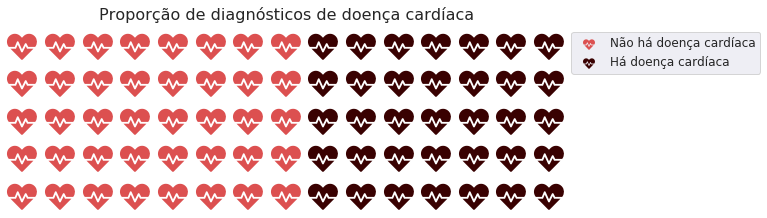

In [14]:
# instalando pacote waffle
!pip install pywaffle -q
from pywaffle import Waffle

# extrair value counts da variavel ocorrencia_classificacao
num = df_clean['num'].value_counts().to_dict()

# plotar gráfico de waffle
fig = plt.figure(
                FigureClass=Waffle,
                rows=5,
                columns=15,
                colors=("#DC5050","#390101"),
                title={'label': 'Proporção de diagnósticos de doença cardíaca',  'fontsize': 16},
                values=num, icons='heartbeat', icon_size=30, labels=('Não há doença cardíaca','Há doença cardíaca'),
                legend={'loc': 'upper left', 'bbox_to_anchor': (1,1), 'fontsize': 12},
                icon_legend=True,
                figsize=(10,6))
fig.set_tight_layout(False)
plt.show();

De acordo com o gráfico, temos que a maioria dos pacientes foi diagnosticado como não tendo doença cardíaca. Porém, a diferença na proporção de pacientes com doença cardíaca ou sem doença cardíaca foi pequena. Só para tornar o resultado exato, temos que:

In [15]:
print('Proporção de pacientes diagnosticados como não tendo doença cardíaca:\t {}%'.format(((df_clean['num'].value_counts()[0]/df_clean.shape[0])*100).round(2)))
print('Proporção de pacientes diagnosticados como tendo doença cardíaca:\t {}%'.format(((df_clean['num'].value_counts()[1]/df_clean.shape[0])*100).round(2)))

Proporção de pacientes diagnosticados como não tendo doença cardíaca:	 53.87%
Proporção de pacientes diagnosticados como tendo doença cardíaca:	 46.13%


Pelos resultados iremos considerar que os dados estão balanceados, dado que a diferença de ocorrências nas duas categorias da variável alvo não é elevada.

### Relação entre a variável alvo e as demais variáveis

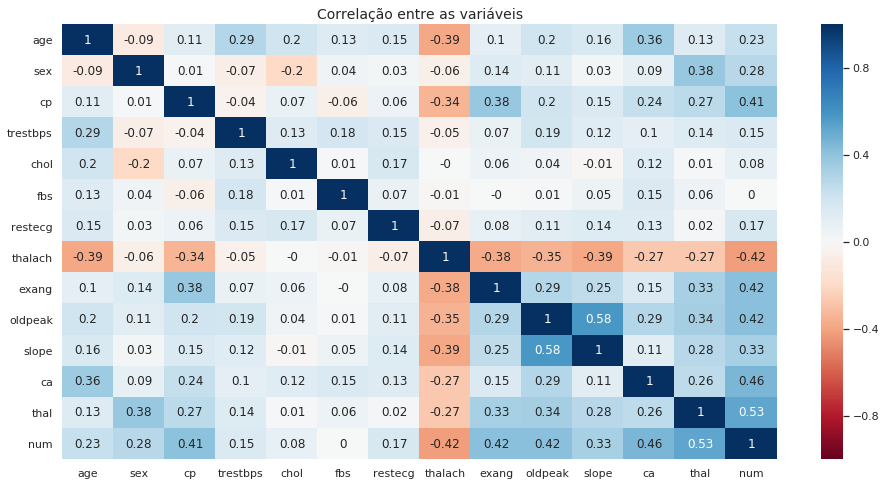

In [16]:
# heatmap (mapa de calor)
fig, ax = plt.subplots(figsize=(16,8))

corr = df_clean.corr().round(2)
sns.heatmap(corr, cmap='RdBu', linecolor='white', annot=True, ax=ax, vmin=-1.00, vmax= 1.00)
ax.set_title('Correlação entre as variáveis', fontsize=14)

plt.show();

De acordo com o gráfico das correlações, é possível observar que a variável `fbs`, que informa se o índice glicêmico do paciente está elevado ou não, não é correlacionada com a variável `num`.

Para observarmos a relação das demais variáveis categóricas com a variável `num`, temos os *countplots* das variáveis dividindo a amostra para pacientes sem diagnóstico e com diagnóstico de doença cardiovascular.

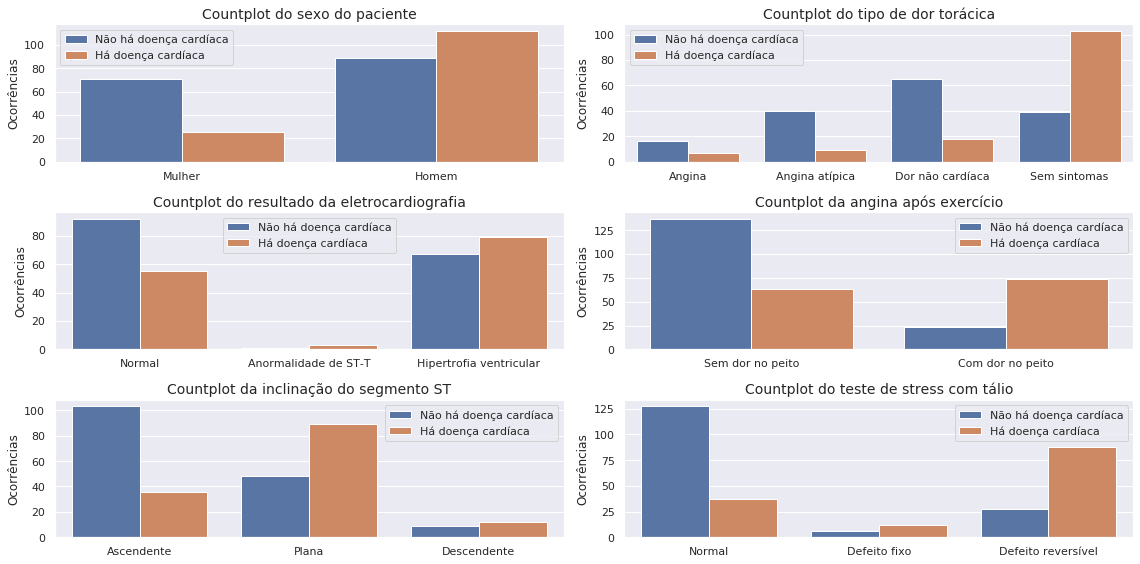

In [17]:
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(16,8))
fig.subplots_adjust(hspace=0.5, wspace=0.3)

# countplot sex
sns.countplot(x='sex', data=df_clean, hue='num', ax=ax[0,0])
ax[0,0].set_xticklabels(['Mulher','Homem'])
ax[0,0].legend(['Não há doença cardíaca','Há doença cardíaca'])
ax[0,0].set_ylabel('Ocorrências', fontsize = 12)
ax[0,0].set_title('Countplot do sexo do paciente', fontsize=14)
ax[0,0].set_xlabel('')

# countplot cp
sns.countplot(x='cp', data=df_clean, hue='num', ax=ax[0,1])
ax[0,1].set_xticklabels(['Angina','Angina atípica','Dor não cardíaca','Sem sintomas'])
ax[0,1].legend(['Não há doença cardíaca','Há doença cardíaca'])
ax[0,1].set_ylabel('Ocorrências', fontsize = 12)
ax[0,1].set_title('Countplot do tipo de dor torácica', fontsize=14)
ax[0,1].set_xlabel('')

# countplot restecg
sns.countplot(x='restecg', data=df_clean, hue='num', ax=ax[1,0])
ax[1,0].set_xticklabels(['Normal','Anormalidade de ST-T','Hipertrofia ventricular'])
ax[1,0].legend(loc='upper center',labels=['Não há doença cardíaca','Há doença cardíaca'])
ax[1,0].set_ylabel('Ocorrências', fontsize = 12)
ax[1,0].set_title('Countplot do resultado da eletrocardiografia', fontsize=14)
ax[1,0].set_xlabel('')

# countplot exang 
sns.countplot(x='exang', data=df_clean, hue='num', ax=ax[1,1])
ax[1,1].set_xticklabels(['Sem dor no peito','Com dor no peito'])
ax[1,1].legend(['Não há doença cardíaca','Há doença cardíaca'])
ax[1,1].set_ylabel('Ocorrências', fontsize = 12)
ax[1,1].set_title('Countplot da angina após exercício', fontsize=14)
ax[1,1].set_xlabel('')

# countplot slope 
sns.countplot(x='slope', data=df_clean, hue='num', ax=ax[2,0])
ax[2,0].set_xticklabels(['Ascendente','Plana','Descendente'])
ax[2,0].legend(['Não há doença cardíaca','Há doença cardíaca'])
ax[2,0].set_ylabel('Ocorrências', fontsize = 12)
ax[2,0].set_title('Countplot da inclinação do segmento ST', fontsize=14)
ax[2,0].set_xlabel('')

# countplot thal 
sns.countplot(x='thal', data=df_clean, hue='num', ax=ax[2,1])
ax[2,1].set_xticklabels(['Normal','Defeito fixo','Defeito reversível'])
ax[2,1].legend(['Não há doença cardíaca','Há doença cardíaca'])
ax[2,1].set_ylabel('Ocorrências', fontsize = 12)
ax[2,1].set_title('Countplot do teste de stress com tálio', fontsize=14)
ax[2,1].set_xlabel('')

fig.tight_layout();

De acordo com os gráficos podemos observar que:

* Dentre as mulheres, há mais pacientes sem diagnóstico de doença cardíaca. Dentre os homens há mais pacientes com doença cardíaca.
* Para pacientes com algum tipo de dor no peito, angina, há mais casos de pacientes sem diagnóstico de doença cardíaca, enquanto para pacientes sem sintomas de dor no peito há uma ocorrência maior de diagnósticos de doença cardíaca.
* Dentre os pacientes que obtiveram um resultado normal na eletrocardiografia, há menos casos de diagnósticos de doença cardíaca. Dentre os pacientes com hipertrofia ventricular há mais casos de doença cardíaca, enquanto todos os pacientes com anormalidade de ST-T foram diagnosticado como tendo doença cardíaca.
* Dentre os pacientes que apresentaram dor no peito após exercício, há mais casos de doença cardiovascular. O contrário pode ser observado para pacientes que não apresentaram dor no peito após exercício.
* Não há muita diferença no número de diagnósticos de doença cardíaca para pacientes com inclinação do ST descentes. Mas para pacientes com inclinação ascendente há menos casos de diagnóstico da doença, enquanto para pacientes com inclianção plana há mais casos de diagnósitico da doença.
* Dentre os pacientes que apresentaram resultado normal no teste de stress cardíaco há mais casos de diagnóstico de ausência de doença cardíaca. Dentre os pacientes com resultados anormais no teste de stress cardíaco, houve mais casos de diagnóstico de doença cardíaca.

*Countplots* são úteis para analisar variáveis categóricas, para as variáveis numéricas é mais interessante observar os *boxplots*.

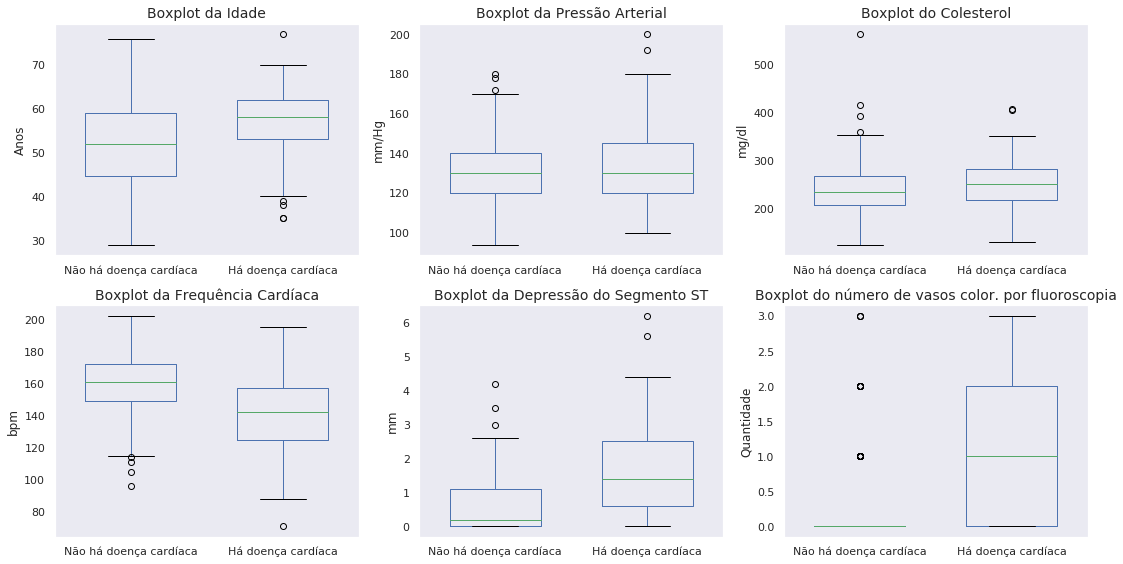

In [18]:
  fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(16,8))
fig.subplots_adjust(hspace=0.5, wspace=0.3)

# histograma age
df_clean.boxplot('age', ax=ax[0,0], widths=0.6, grid=False, by = 'num')
ax[0,0].set_xticklabels(['Não há doença cardíaca','Há doença cardíaca'])
ax[0,0].set_ylabel('Anos', fontsize = 12)
ax[0,0].set_xlabel('')
ax[0,0].set_title('Boxplot da Idade', fontsize=14)
fig.suptitle('')

# histograma trestbps
df_clean.boxplot(['trestbps'], ax=ax[0,1], by = 'num', widths=0.6, grid=False)
ax[0,1].set_xticklabels(['Não há doença cardíaca','Há doença cardíaca'])
ax[0,1].set_ylabel('mm/Hg', fontsize = 12)
ax[0,1].set_title('Boxplot da Pressão Arterial', fontsize=14)
ax[0,1].set_xlabel('')
fig.suptitle('')

# histograma chol
df_clean.boxplot(['chol'], ax=ax[0,2], by = 'num', widths=0.6, grid=False)
ax[0,2].set_xticklabels(['Não há doença cardíaca','Há doença cardíaca'])
ax[0,2].set_ylabel('mg/dl', fontsize = 12)
ax[0,2].set_title('Boxplot do Colesterol', fontsize=14)
ax[0,2].set_xlabel('')
fig.suptitle('')

# histograma thalach
df_clean.boxplot(['thalach'], ax=ax[1,0], by = 'num', widths=0.6, grid=False)
ax[1,0].set_xticklabels(['Não há doença cardíaca','Há doença cardíaca'])
ax[1,0].set_ylabel('bpm', fontsize = 12)
ax[1,0].set_title('Boxplot da Frequência Cardíaca', fontsize=14)
ax[1,0].set_xlabel('')
fig.suptitle('')

# histograma oldpeak 
df_clean.boxplot(['oldpeak'], ax=ax[1,1], by = 'num', widths=0.6, grid=False)
ax[1,1].set_xticklabels(['Não há doença cardíaca','Há doença cardíaca'])
ax[1,1].set_ylabel('mm', fontsize = 12)
ax[1,1].set_title('Boxplot da Depressão do Segmento ST', fontsize=14)
ax[1,1].set_xlabel('')
fig.suptitle('')

# histograma ca 
df_clean.boxplot(['ca'], ax=ax[1,2], by = 'num', widths=0.6, grid=False)
ax[1,2].set_xticklabels(['Não há doença cardíaca','Há doença cardíaca'])
ax[1,2].set_ylabel('Quantidade', fontsize = 12)
ax[1,2].set_title('Boxplot do número de vasos color. por fluoroscopia', fontsize=14)
ax[1,2].set_xlabel('')
fig.suptitle('')

fig.tight_layout();

De acordo com os *boxplots* acima, podemos observar que:

* Pacientes diagnosticados com doença cardíaca apresentam uma mediana para a idade superior aos pacientes que não tenham doença.
* A pressão arterial não difere muito para quem tem ou não doença cardíaca. Mas é possível que pacientes com doenças cardiovasculares apresentem pressão arterial muito elevado, sendo ate discrepantes dos demais pacientes.
* Para o colesterol temos uma relação oposta, alguns pacientes que não foram diagnosticados com doença cardíaca apresentaram níveis de colesterol muito elevados.
* Para a frequência cardíaca temos que a mediana da variável considerando somente pacientes com doença cardíaca é maior do que quando é considerado somente pacientes sem a doença.
* Pacientes com diagnóstico de doença cardíaca apresentam uma depressão do segmento ST maior do que pacientes sem o diagnóstico.
* É esperado que pacientes com doença cardíaca apresentem vasos principais coloridos por fluoroscopia. Para pacientes que não apresentam diagnóstico de doença cardiovascular, ter vasos principais coloridos por fluoroscopia é considerado como discrepante.

Analisando tanto os *countplots* quanto os *boxplots* podemos observar a influência das demais variáveis na nossa variável alvo. Logo, nosso modelo será estimado incluindo todas as variáveis do *dataset*, com exceção da variável `fbs` que apresentou uma correlação igual a zero com a variável `num`.


## Modelo de *Machine Learning*

Após indicar quais variáveis serão incluídas no modelo, o próximo passo é estimá-lo! Como nossa variável alvo é categórica, ou seja, ela divide os pacientes em dois grupos: aqueles sem doença cardíaca e os que possuem doença cardíaca, teremos que estimar um modelo de classificação.

Usaremos então uma regressão logística, que tem como objetivo avaliar a probabilidade de ocorrência de um determinado evento, ou seja, avaliar a probabilidade de um paciente ter um diagnóstico de doença cardíaca a partir de suas características pessoais e médicas.

In [0]:
# importando pacotes

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score

### Estimação e avaliação do modelo de regressão logística

O primeiro passo é separar nosso `DataFrame` em uma `Series`, que contém nossa variável alvo, `y`, e um `DataFrame` somente com as variáveis explicativas, `X`. Tendo feito essa separação, iremos dividir os dados em um conjunto de treino e um conjunto de teste utilizando a função `train_test_split`.

Essa é uma prática comum em modelos de *Machine Learning*, primeiro nós iremos treinar nosso modelo utilizando os dados de treino. No caso, nosso modelo estará ajustado de maneira ótima aos dados de treino, mas para verificar sua qualidade iremos testá-lo com dados "desconhecidos". 

Nosso *dataset* de treino terá 80% dos dados originais e o restante será utilizado para teste.

In [20]:
# separando variáveis explicativas e dependente
X = df_clean.drop(['num','fbs'], axis = 1)
y = df_clean['num']

# conjunto de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=50)

# criando e estimando o modelo
ml_model = LogisticRegression(solver='liblinear')
ml_model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

O método de solução do modelo de regressão logística foi o `liblinear`, que segundo a [documentação](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) da função `LogisticRegression` é mais indicada para *datasets* menores.

Tendo estimado o modelo utilizando os dados de treino, iremos utilizar os dados das variáveis explicativas de teste para prever, utilizando a função `predict`, se aquele paciente tem um diagnóstico de doença cardíaca ou não.  

Além do resultado de diagnóstico, temos também a probabilidade do paciente que está inserido no grupo de teste de ter ou não um diagnóstico de doença cardíaca.

In [21]:
# calculando y previsto e probabilidade do y previsto
y_pred = ml_model.predict(X_test)
y_prob = ml_model.predict_proba(X_test)

# exibindo valores
print("y_pred: \n", y_pred[0:2])
print("\ny_prob: \n", y_prob[0:2])

y_pred: 
 [1 0]

y_prob: 
 [[0.00519907 0.99480093]
 [0.92316446 0.07683554]]


Como exemplo temos os 2 primeiros resultados. Podemos observar que:

* Dadas suas características pessoais e médicas, o primeiro paciente foi diagnosticado como tendo doença cardíaca. A probabilidade dele realmente ter doença cardíaca é de 99%.
* O segundo paciente, por sua vez, foi diagnosticado como não tendo doença cardíaca, dadas as suas características. No caso, a probabilidade dele ter doença cardíaca é de, aproximadamente, 8%.

Lembrando que se um modelo prever que um paciente tem 99% de chance de ter doença cardíaca e esse paciente não ter a doença, esse modelo é pior que um outro modelo que prevê que um paciente tem 55% de chance de ter doença cardíaca quando na verdade ele não tem.

A utilidade de separar os dados em teste e treino é que podemos comparar a validade desses resultados, já que temos os verdadeiros valores sobre o diagnóstico desses pacientes em relação à doença cardiovascular. Para isso, temos as seguintes métricas de avaliação:

* precisão: proporção de diagnósticos feitos corretamente em relação aos diagnósticos preditos. Por exemplo, número de diagnósticos de doença cardíaca feitos corretamente, dividido pela soma do número de diagnósticos de doença cardíaca feitos de maneira correta com o número de diagnósticos de doença cardíaca feitos de maneira incorreta (falso positivo).
* *recall*: proporção de diagnósticos feitos corretamente em relação aos diagnósticos reais. Por exemplo, número de diagnósticos de doença cardíaca feitos corretamente, dividido pela soma do número de diagnósticos de doença cardíaca feitos de maneira correta com o número de diagnósticos de doença cardíaca que o modelo não conseguiu prever (falso negativo).
* acurácia: quantidade de diagnósticos feitos corretamente em relação ao total de diagnósticos.
* AUC: mede o quanto o modelo é capaz de distinguir entre ter ou não doença cardíaca. Para saber mais sobre essa medida, este [artigo](https://towardsdatascience.com/understanding-auc-roc-curve-68b2303cc9c5) é excelente.

Todos esses valores variam entre 0 e 1, sendo que quanto mais perto de 0 menos qualidade tem o modelo, e quanto mais perto de 1 mais o modelo é bem ajustado.

In [22]:
# imprimir relatório de classificação
print("Relatório de Classificação:\n", classification_report(y_test, y_pred, digits=4))
 
# imprimir a acurácia do modelo
print("Acurácia: {:.4f}\n".format(accuracy_score(y_test, y_pred)))
 
# imprimir a área sob a curva
print("AUC: {:.4f}\n".format(roc_auc_score(y_test,y_prob[:,1])))

Relatório de Classificação:
               precision    recall  f1-score   support

           0     0.8611    0.9118    0.8857        34
           1     0.8750    0.8077    0.8400        26

    accuracy                         0.8667        60
   macro avg     0.8681    0.8597    0.8629        60
weighted avg     0.8671    0.8667    0.8659        60

Acurácia: 0.8667

AUC: 0.9106



Pelos resultados, nosso modelo tem uma acurácia de, aproximadamente, 87%, enquanto a AUC é de 0.91. Com esses resultados é possível afirmar que o modelo, globalmente, é bem ajustado. 

Mas é possível que um modelo seja globalmente bem ajustado, mas que para prever uma categoria em especifíco ele seja ruim. Para observar isso temos as medidas de precisão e *recall*. Podemos analisar essas medidas através do relatório de classificação, mas utilizando uma Matriz de Confusão a visualização dos resultados fica mais simples.

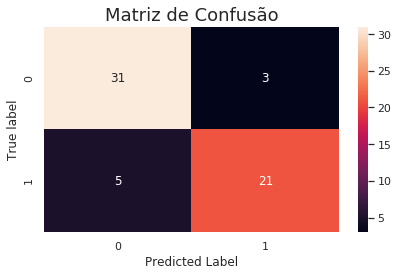

In [23]:
fig, ax = plt.subplots()
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, ax=ax)

ax.set_title("Matriz de Confusão", fontsize=18)
ax.set_ylabel("True label")
ax.set_xlabel("Predicted Label")

plt.tight_layout()

De acordo com a Matriz de Confusão, temos que:

* O modelo previu corretamente 31 casos de pacientes que não foram diagnosticados com doença cardíaca.
* Além disso, o modelo previu corretamente 21 casos de pacientes que foram diagnosticados com doença cardíaca.
* Para 5 pacientes que possuem doença cardíaca, o modelo previu que eles não teriam a doença.
* Para 3 pacientes sem doença cardíaca, o modelo previu que eles teriam a doença.

Pelos resultados, temos que o modelo é globalmente bem ajustado e que ambas as características, ter ou não doença cardíaca, são previstas de maneira satisfatória.

### Realizando previsões



De acordo com as métricas de avaliação vimos que o nosso modelo estimado é bem ajustado. Com isso, considerando que o objetivo final de todo modelo estimado é realizar previsões, iremos utilizar nosso modelo para prever a probabilidade de uma pessoa ser diagnosticada como tendo ou não doença cardíaca.

Para fazer a previsão temos que atribuir um valor para cada atributo do modelo. Lembrando que a ordem de entrada dos valores para as variáveis tem que seguir a mesma ordem do *dataset* das variáveis explicativas.

In [73]:
X.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'restecg', 'thalach', 'exang',
       'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')

Para realizar a previsão, irei utilizar minhas informações pessoais e médicas. Recentemente fiz alguns exames de rotina, por isso, para alguns atributos eu tenho os valores reais. Para outros atributos eu fiz uma previsão.

In [74]:
age = 27.0
sex = 1.0
cp = 4.0
trestbps = 110.0
chol = 52.0
restecg = 0.0
thalach = 100.0
exang = 0.0
oldpeak = 1.0
slope = 1.0
ca = 0.0
thal = 3.0
entrada = [[age, sex, cp, trestbps, chol, restecg, thalach, exang, oldpeak, slope, ca, thal]]

print('Previsão: {}'.format(ml_model.predict(entrada)[0]))

Previsão: 0


De acordo com o modelo estimado, eu não fui diagnosticado como tendo doença cardíaca.

In [27]:
ml_model.predict_proba(entrada)

array([[0.52404969, 0.47595031]])

Mas observando as probabilidades, é possível observar que essa previsão está no limite de mudança de categoria. 

A seguir, está um simulador interativo para as previsões do modelo estimado. Sinta-se a vontade para realizar a sua previsão de diagnóstico (se estiver lendo esse *notebook* pelo GitHub, basta abrí-lo no Google Colab e replicar todos os códigos). Mas **lembre-se** que esse é um modelo de previsão! Somente um médico pode realmente te diagnosticar em relação a ocorrência ou não de doença cardiovascular.

In [0]:
# Importando bibliotecas
from ipywidgets import widgets, HBox, VBox, Layout, Label
from IPython.display import  display
style = {'description_width': '150px'}
style1 = {'description_width': '210px'}
style2 = {'description_width': '230px'}
layout = {'width': '400px'}

# Criando os controles do formulário
age = widgets.Text(description="Idade (anos):", style=style, layout=layout)

sex = widgets.RadioButtons(
    options=[('Homem', 1), ('Mulher', 0)],
    description='Sexo:',
    disabled=False, style=style
)

cp = widgets.RadioButtons(
    options=[('Angina', 1), ('Angina atípica', 2),('Dor não cardíaca', 3), ('Sem sintomas', 4)],
    description='Tipo de dor torácica:',
    disabled=False, style=style
)

trestbps = widgets.Text(description="Pressão arterial (mm/Hg):", style=style, layout=layout)

chol = widgets.Text(description="Colesterol (mg/dl):", layout=layout, style=style)

restecg = widgets.RadioButtons(
    options=[('Normal', 0), ('Anormalidade do ST-T', 1),('Hipertrofia ventricular', 2)],
    description='Eletrocardiografia:',
    disabled=False, style=style, layout=layout
)

thalach = widgets.Text(description="Frequência cardíaca (bpm):" , style=style1, layout=layout)

exang = widgets.RadioButtons(
    options=[('Não', 0), ('Sim', 1)],
    description='Angina após exercício:',
    disabled=False, style=style, layout=layout
)

oldpeak = widgets.Text(description="Depressão do Segmento ST (mm):", style=style1, layout=layout)

slope = widgets.RadioButtons(
    options=[('Ascendente', 1), ('Plana', 2), ('Descendente',3)],
    description='Inclinação do segmento ST-T:',
    disabled=False , style=style1, layout=layout
)
ca = widgets.Text(description="Vasos color. por fluoroscopia (quant.):", style=style2, layout=layout)

thal = widgets.RadioButtons(
    options=[('Normal', 3), ('Defeito fixo', 6), ('Defeito reversível',7)],
    description='Teste de stress cardíaco:',
    disabled=False, style=style
)

botao = widgets.Button(description="Simular") 

left = VBox([age, trestbps, chol,thalach, oldpeak, ca, slope], layout=Layout(width='50%'))
right = VBox([sex, exang, thal, cp, restecg])
inputs = HBox([left, right])


# Função de simulação
def simulador(sender):
    entrada=[[
                float(age.value if age.value else 0), 
                float(sex.value if sex.value else 0), 
                float(cp.value if cp.value else 0), 
                float(trestbps.value if trestbps.value else 0), 
                float(chol.value if chol.value else 0), 
                float(restecg.value if restecg.value else 0),
                float(thalach.value if thalach.value else 0), 
                float(exang.value if exang.value else 0), 
                float(oldpeak.value if oldpeak.value else 0), 
                float(slope.value if slope.value else 0), 
                float(ca.value if ca.value else 0), 
                float(thal.value if thal.value else 0)
             ]]
    valor = ml_model.predict(entrada)[0]
    if valor == 0:
      diagn =  'Sem diagnóstico de doença cardiovascular.'
    else:
      diagn = 'Com diagnóstico de doença cardiovascular.'
    print('Previsão: {}\n'.format(diagn))
    print('Probabilidade: {}%'.format(float(((ml_model.predict_proba(entrada)[:,valor])*100).round(3))))
# Atribuindo a função "simulador" ao evento click do botão
botao.on_click(simulador)    

In [78]:
display(inputs, botao)

Button(description='Simular', style=ButtonStyle())

Previsão: Sem diagnóstico de doença cardiovascular.

Probabilidade: 52.405%
